In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

%matplotlib inline

In [3]:
uploaded = files.upload()

data=pd.read_csv('final_project.csv')

Saving final_project.csv to final_project.csv


In [4]:
df=data

In [5]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [6]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [8]:
df.shape

(500000, 26)

**Data Normalization**

In [9]:
df.drop(['User Name','Driver Name','User ID'], axis=1, inplace=True)
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [10]:


# Assuming df is your original DataFrame
encoded_df = pd.get_dummies(df, columns=['Car Condition', 'Weather', 'Traffic Condition'], drop_first=True)


In [11]:
encoded_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,...,bearing,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,...,-2.918897,False,False,True,False,False,False,True,False,False
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,...,-0.375217,True,False,False,False,False,False,False,False,True
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,...,2.599961,False,False,False,False,True,False,False,False,False
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,...,0.133905,False,False,True,False,True,False,False,False,True
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,...,-0.502703,False,False,False,False,True,False,False,False,False


In [12]:
#check null values
print(df.isnull().count())

Car Condition        500000
Weather              500000
Traffic Condition    500000
key                  500000
fare_amount          500000
pickup_datetime      500000
pickup_longitude     500000
pickup_latitude      500000
dropoff_longitude    500000
dropoff_latitude     500000
passenger_count      500000
hour                 500000
day                  500000
month                500000
weekday              500000
year                 500000
jfk_dist             500000
ewr_dist             500000
lga_dist             500000
sol_dist             500000
nyc_dist             500000
distance             500000
bearing              500000
dtype: int64


In [13]:
df=df.fillna(0)

In [14]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
499995,False
499996,False
499997,False
499998,False


# Data Analysis

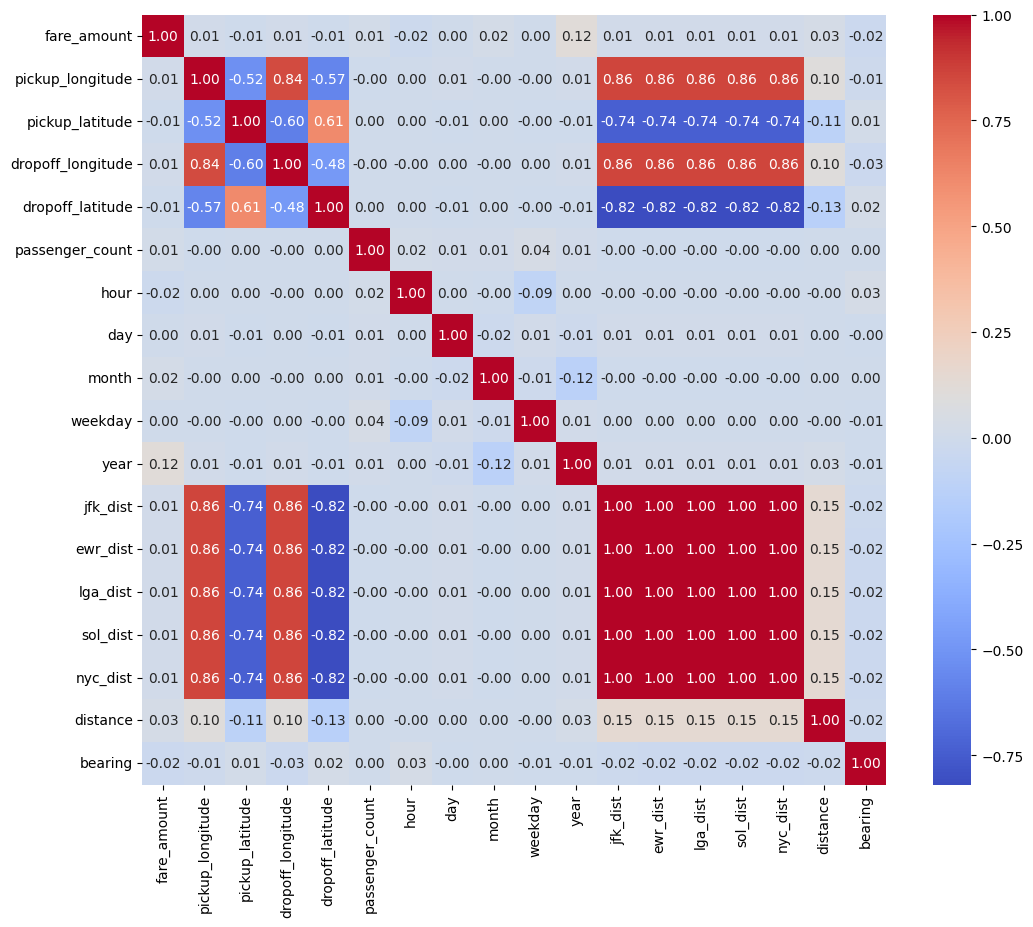

In [15]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Car Condition      500000 non-null  object 
 1   Weather            500000 non-null  object 
 2   Traffic Condition  500000 non-null  object 
 3   key                500000 non-null  object 
 4   fare_amount        500000 non-null  float64
 5   pickup_datetime    500000 non-null  object 
 6   pickup_longitude   500000 non-null  float64
 7   pickup_latitude    500000 non-null  float64
 8   dropoff_longitude  500000 non-null  float64
 9   dropoff_latitude   500000 non-null  float64
 10  passenger_count    500000 non-null  int64  
 11  hour               500000 non-null  int64  
 12  day                500000 non-null  int64  
 13  month              500000 non-null  int64  
 14  weekday            500000 non-null  int64  
 15  year               500000 non-null  int

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000,500000,500000,500000,500000.000000,500000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
unique,4,5,3,500000,NaN,461206,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Very Good,sunny,Congested Traffic,2015-04-17 23:46:54.0000001,NaN,2012-01-26 21:22:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,125312,100433,166847,1,NaN,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.358361,NaN,-1.265712,0.696740,-1.265743,0.696668,...,6.268650,3.042008,2011.739132,385.275515,380.499852,363.840134,363.670401,355.987863,19.468581,0.297142
std,NaN,NaN,NaN,NaN,9.916617,NaN,0.206941,0.140909,0.205941,0.129015,...,3.437815,1.949240,1.860889,2419.075694,2428.792894,2425.064050,2428.336813,2428.718956,367.297770,1.804540
min,NaN,NaN,NaN,NaN,-44.900000,NaN,-52.119764,-54.389440,-59.049665,-44.676047,...,1.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.141593
25%,NaN,NaN,NaN,NaN,6.000000,NaN,-1.291405,0.710958,-1.291393,0.710943,...,3.000000,1.000000,2010.000000,41.341465,32.173584,17.100586,14.886940,7.147264,1.214541,-0.854710
50%,NaN,NaN,NaN,NaN,8.500000,NaN,-1.291226,0.711268,-1.291197,0.711277,...,6.000000,3.000000,2012.000000,42.523153,34.787438,19.591521,18.347493,10.458103,2.116956,-0.050423
75%,NaN,NaN,NaN,NaN,12.500000,NaN,-1.290970,0.711520,-1.290908,0.711538,...,9.000000,5.000000,2013.000000,43.785642,38.304440,22.214777,22.417794,14.448641,3.890026,2.206761



Missing Values:


,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0



Distribution of Numeric Features:


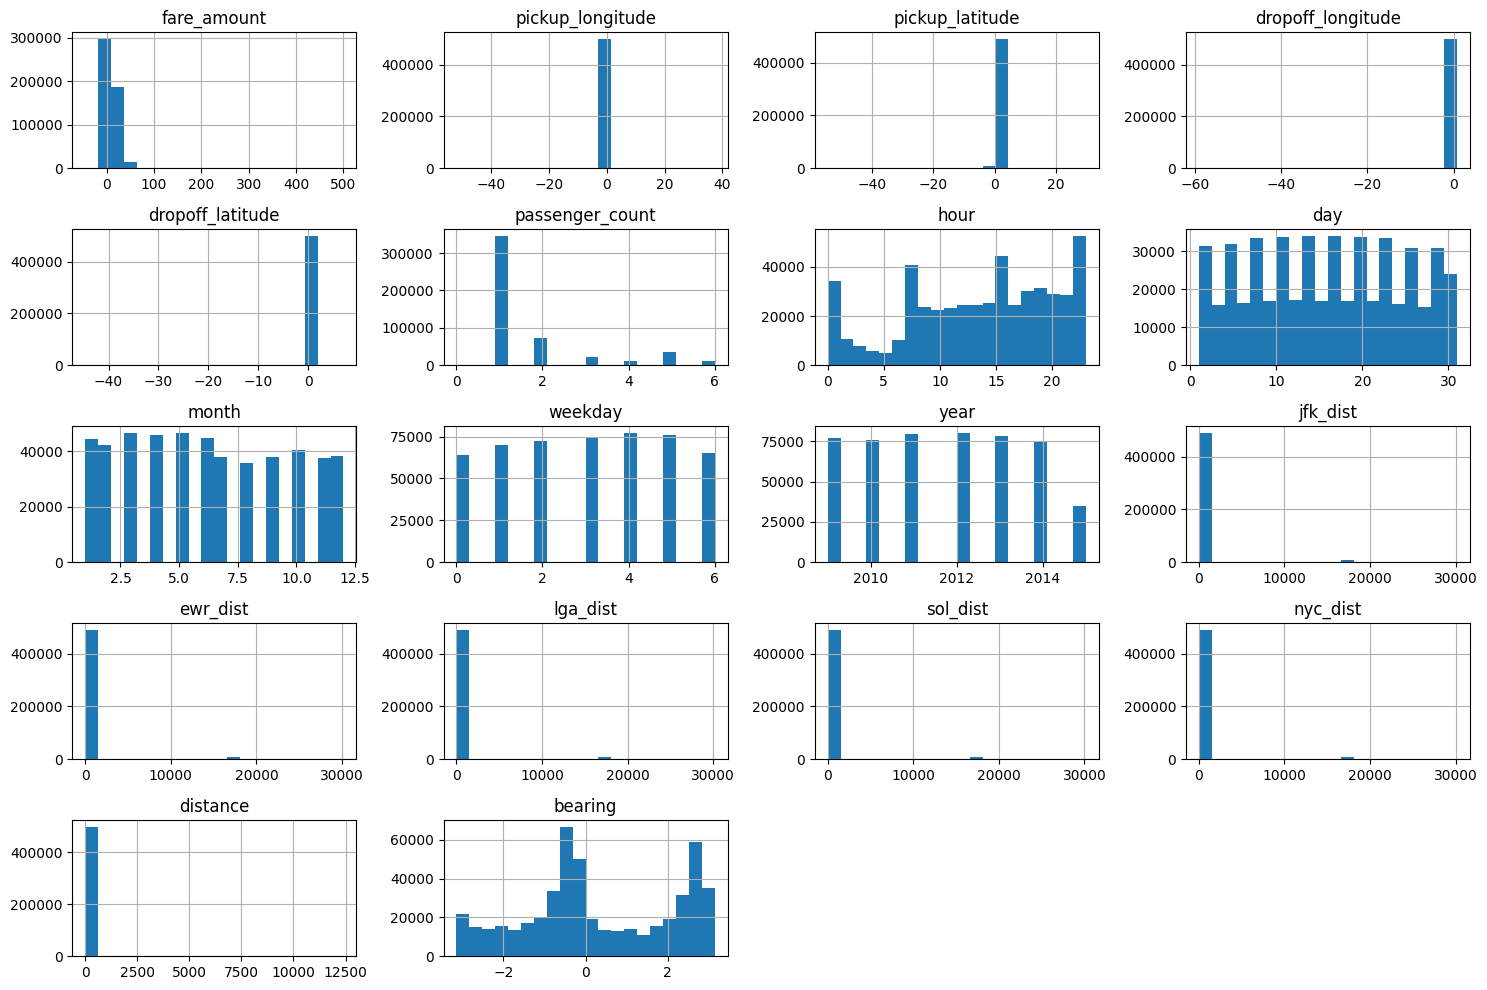


Correlation Heatmap:


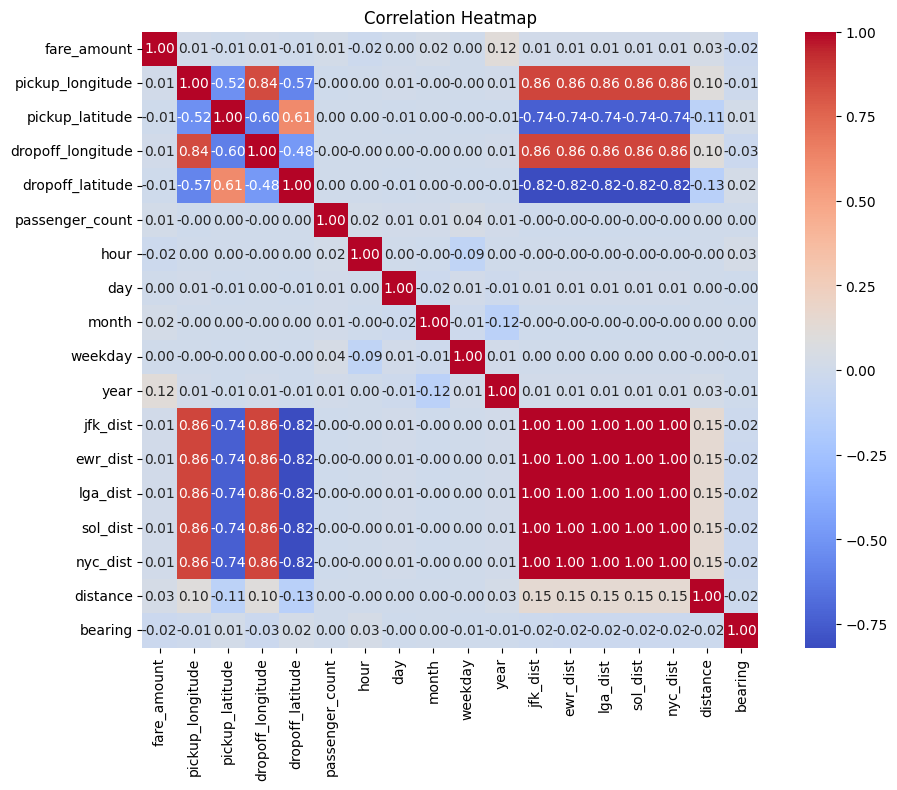


Boxplots for Outlier Detection:


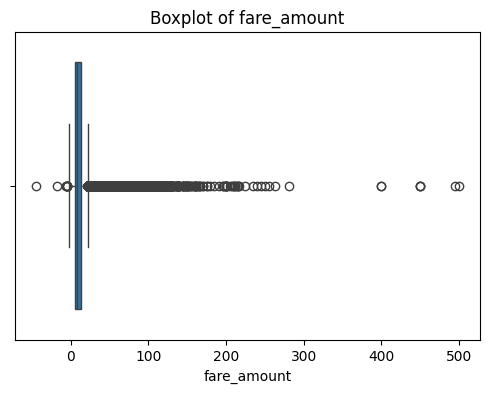

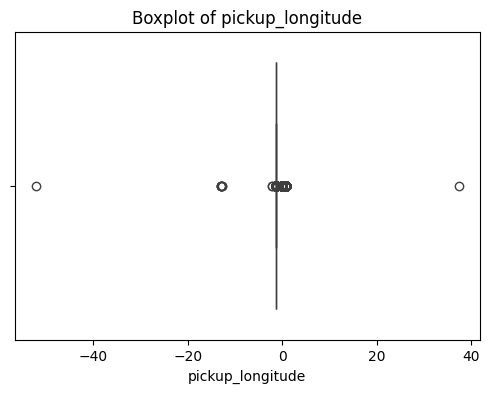

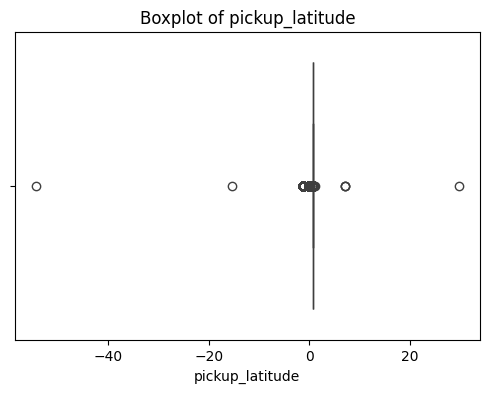

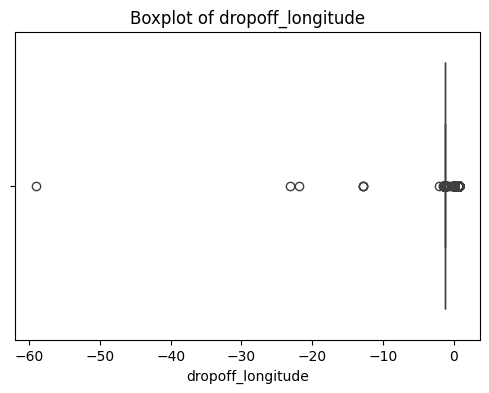

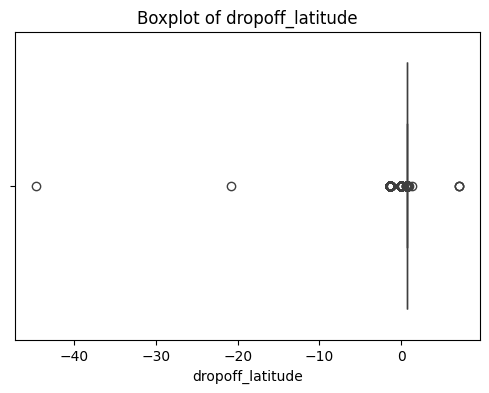

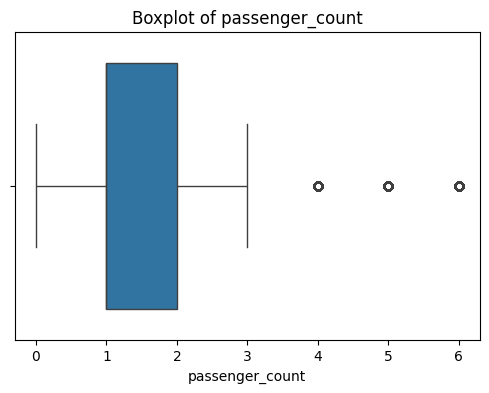

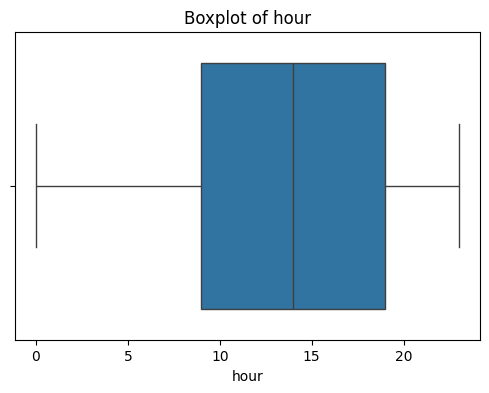

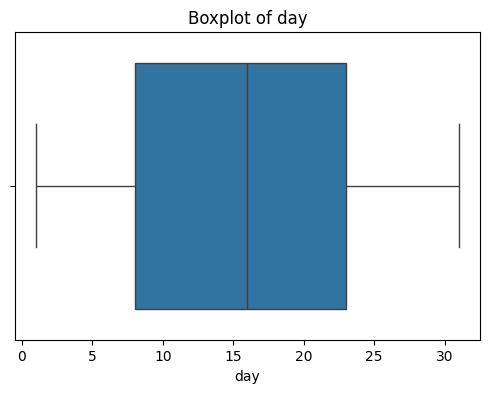

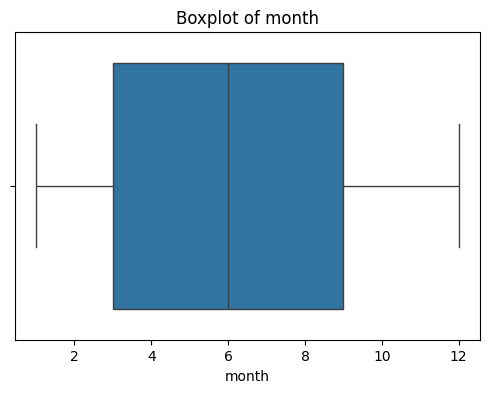

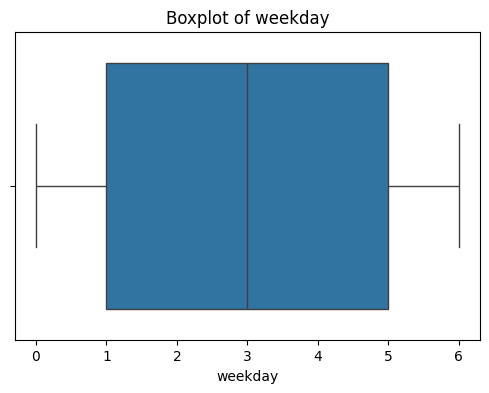

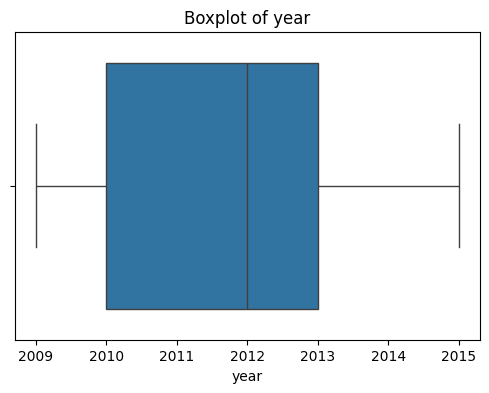

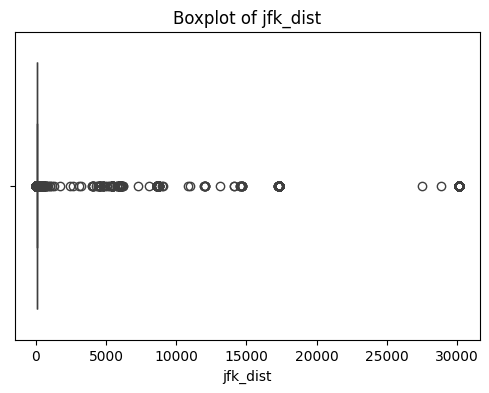

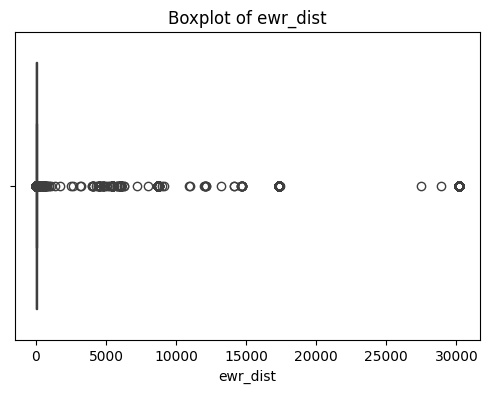

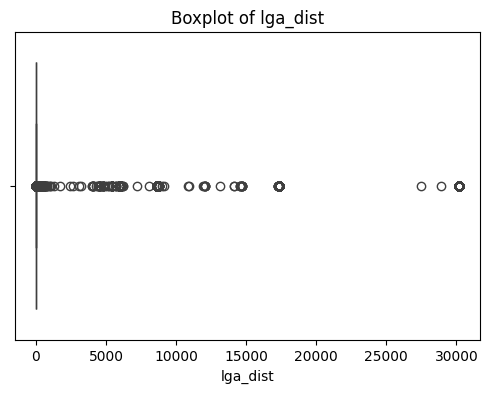

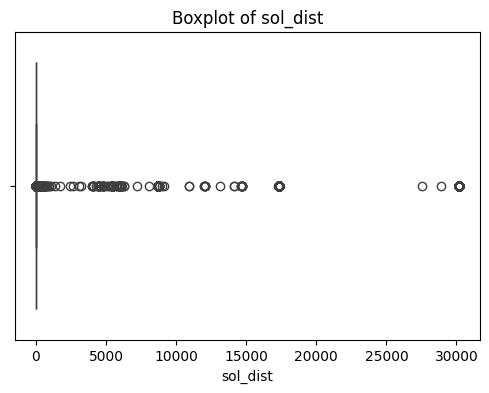

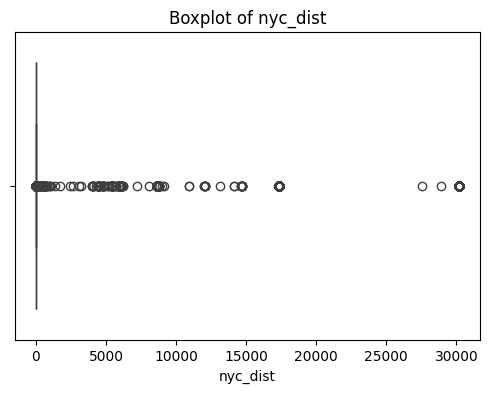

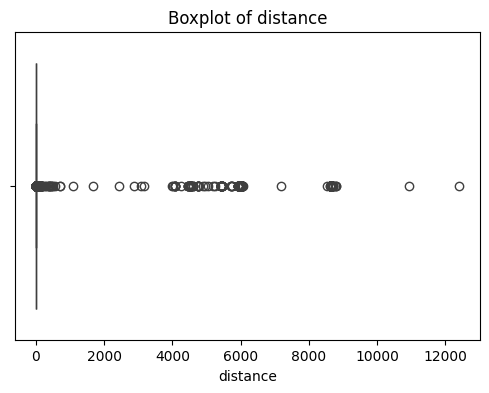

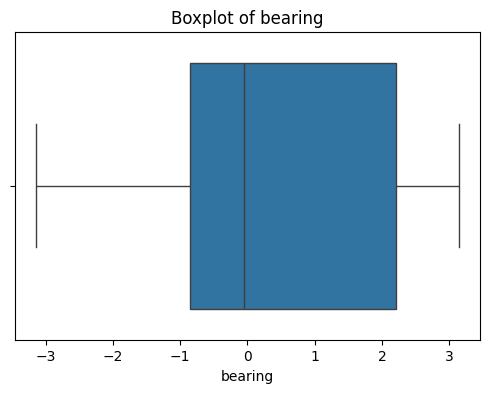

In [22]:


# Display basic info
print("Basic Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Visualize distributions of numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("\nDistribution of Numeric Features:")
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to check for outliers
print("\nBoxplots for Outlier Detection:")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



#PCA

In [18]:
X = encoded_df.drop(['key', 'pickup_datetime'], axis=1, errors='ignore')
X_filled = X.fillna(0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)



In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"PCA shape: {X_pca.shape}")


Original shape: (500000, 27)
PCA shape: (500000, 18)


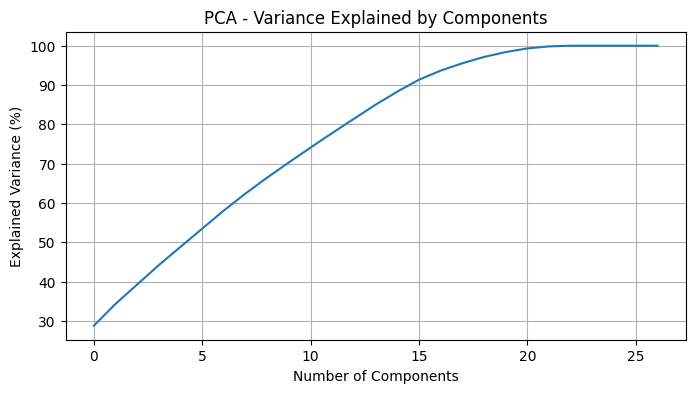

In [20]:
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')
plt.title('PCA - Variance Explained by Components')
plt.grid(True)
plt.show()
